In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r"C:\ml\da\global_heat_index.csv")
data.head(40)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [4]:
data=data[data['Solar Radiation (GHI)']!=0]

<Axes: >

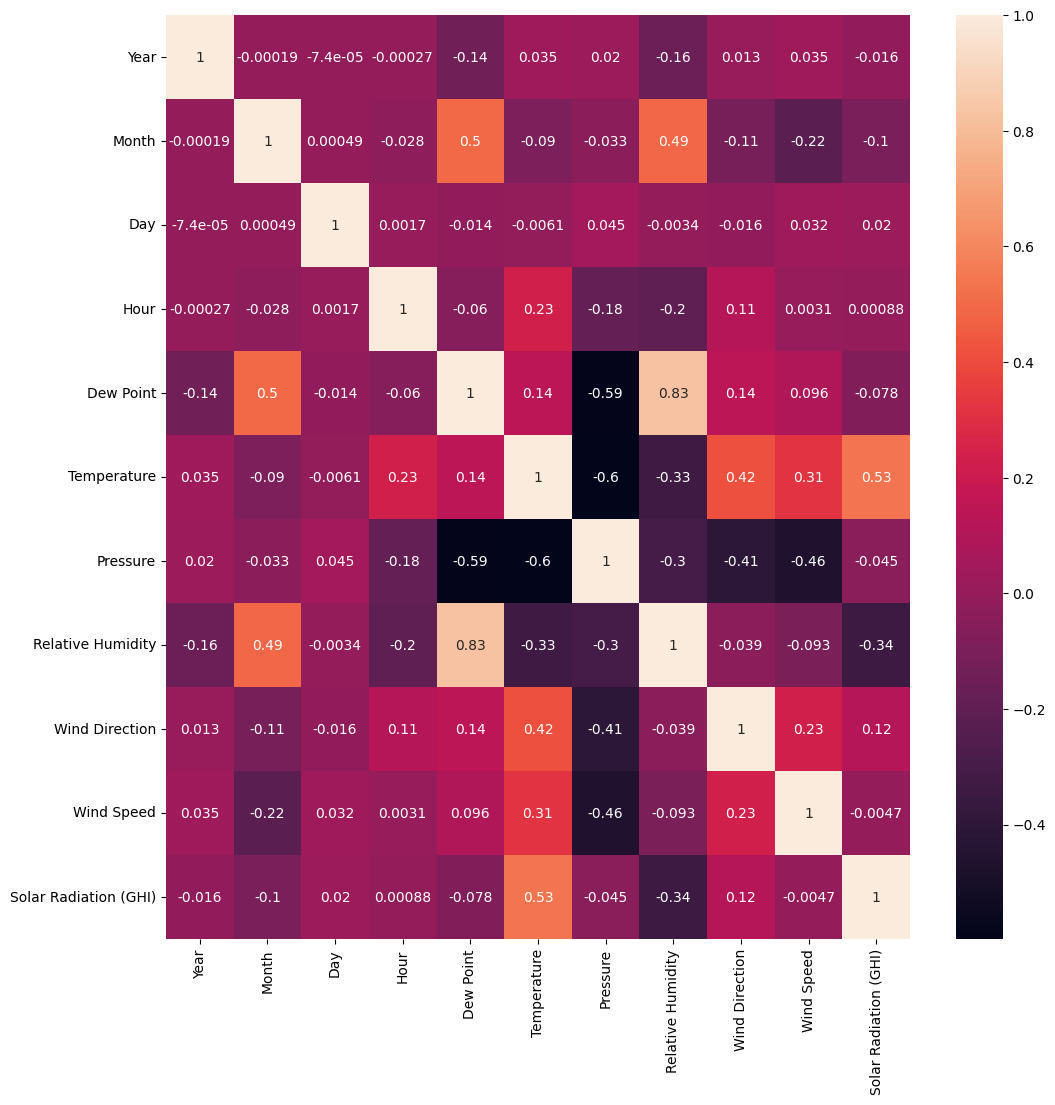

In [5]:
from sklearn.preprocessing import MinMaxScaler
x=data.iloc[:1000,0:10]
y=data.iloc[:1000,-1]
x=pd.DataFrame(MinMaxScaler().fit_transform(x))
corr=x.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot= True)

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
col=['Year','Month','Day','Hour','DewPoint','Temp',"pressure",'RH','Wind dir','s']
feat_imp=pd.Series(model.feature_importances_,index=col)


<Axes: >

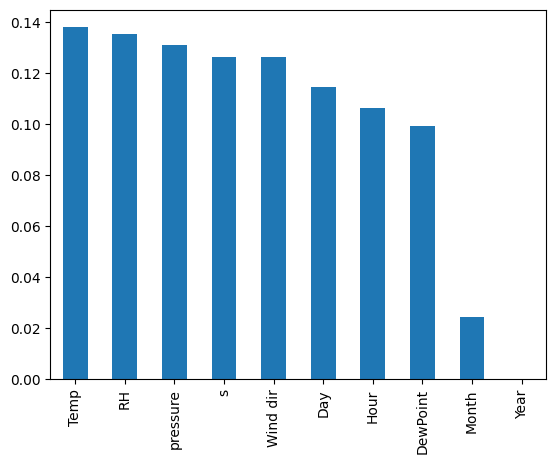

In [7]:
feat_imp.nlargest(10).plot(kind="bar")

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeature=SelectKBest(score_func=chi2,k=10).fit(x,y)

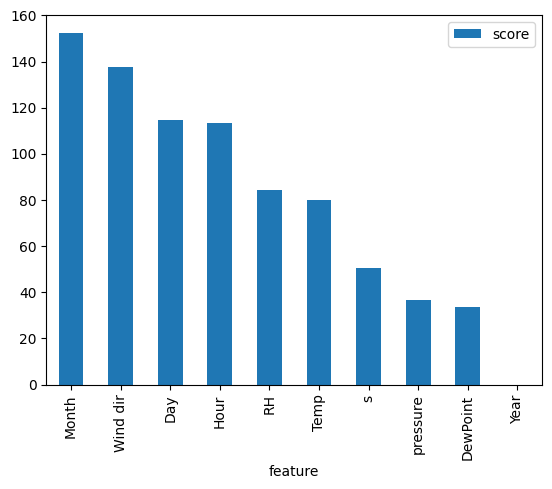

In [21]:
score=pd.DataFrame(bestfeature.scores_)

columns=pd.DataFrame(col)

feature_score=pd.concat([columns,score],axis=1)

feature_score.columns=['feature','score']

feature_score.nlargest(10,"score").plot(kind="bar",x='feature',y="score")
plt.show()